In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/sales_data_with_discounts.csv')
data



,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
data.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


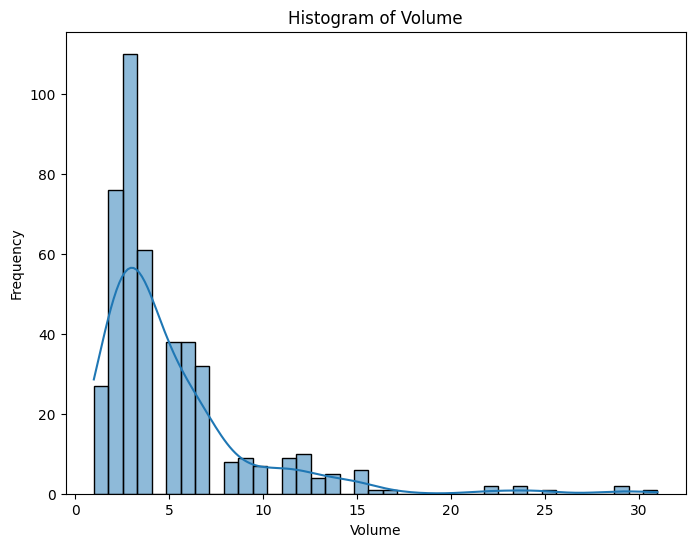

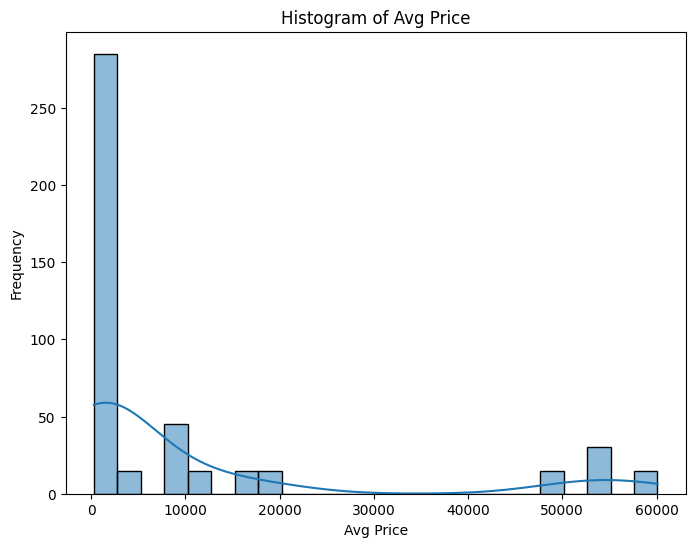

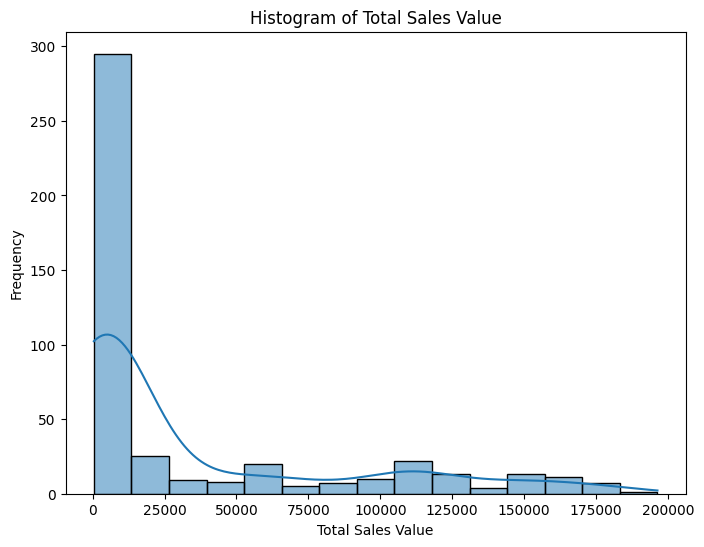

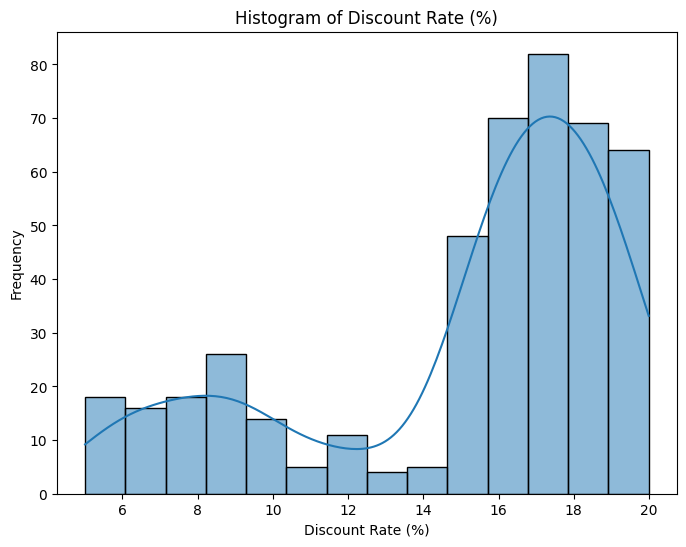

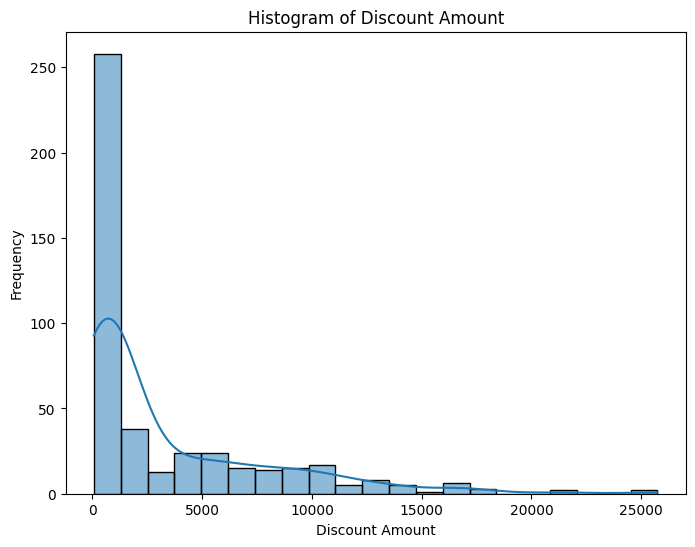

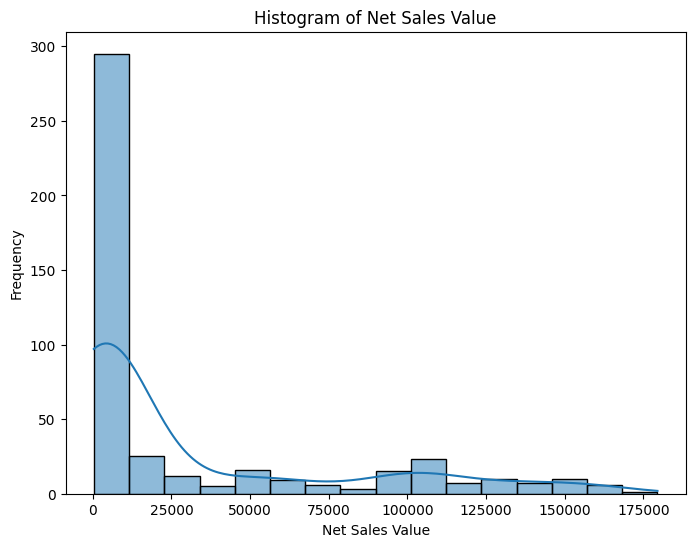

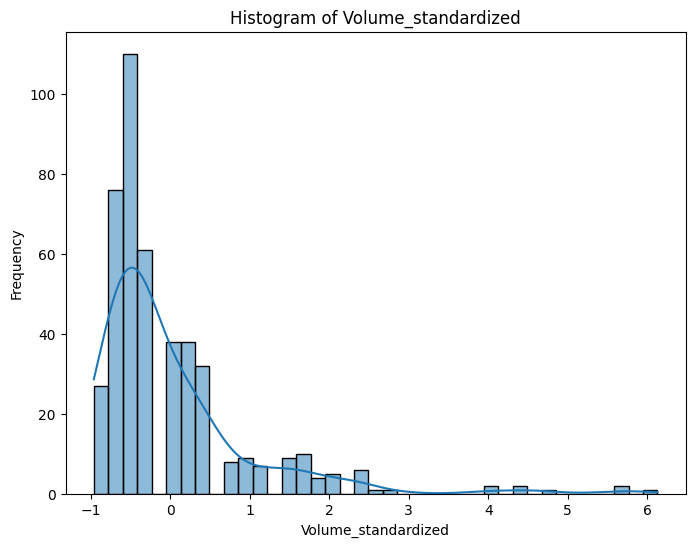

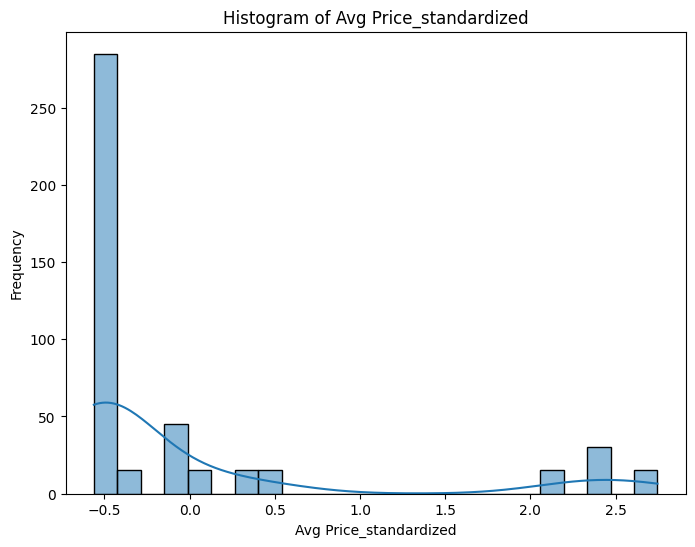

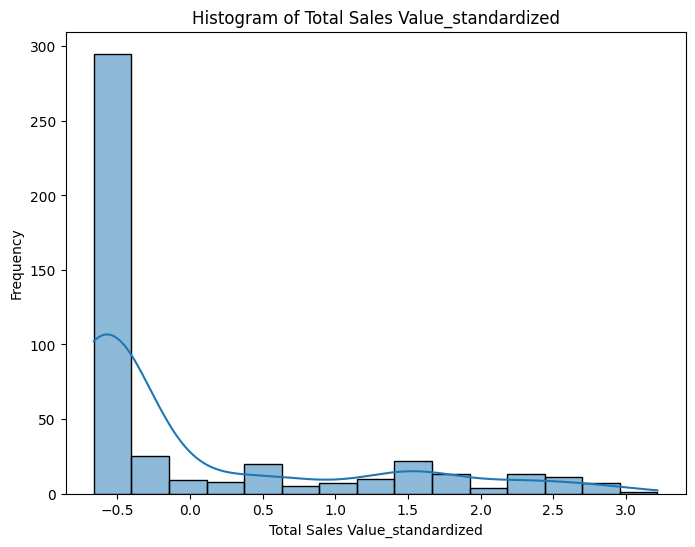

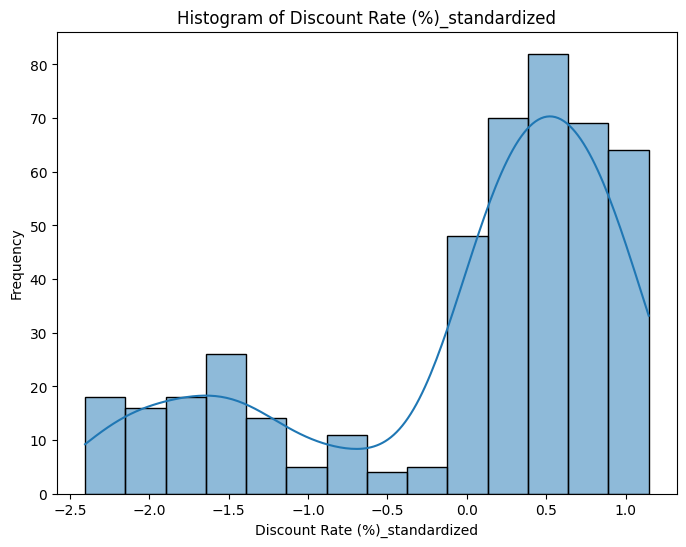

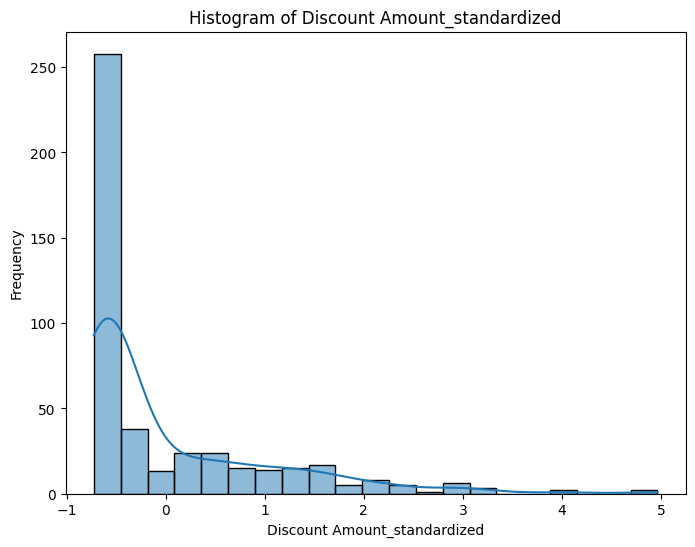

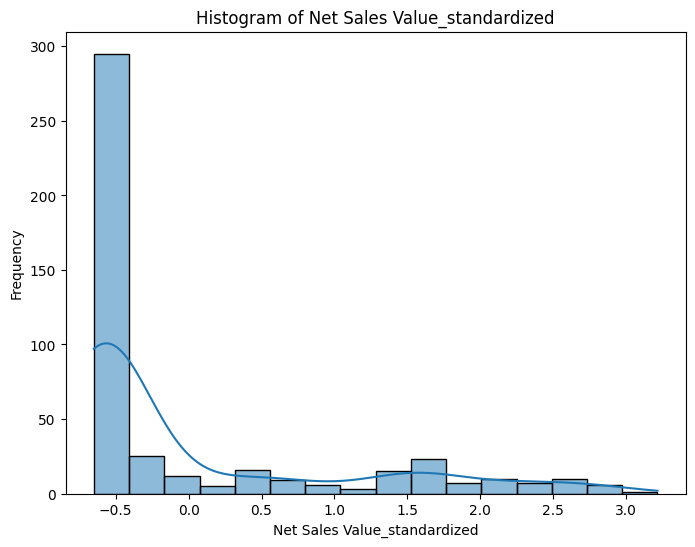

In [ ]:
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.histplot(data[col], kde=True)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
for col in numerical_cols:
    skewness = data[col].skew()
    print(f"Skewness of {col}: {skewness}")
    if abs(skewness) > 0.5:
        print(f"  {col} is moderately skewed.")
    elif abs(skewness) > 1:
        print(f"  {col} is highly skewed.")

Skewness of Volume: 2.731723626557714
  Volume is moderately skewed.
Skewness of Avg Price: 1.9088730767759727
  Avg Price is moderately skewed.
Skewness of Total Sales Value: 1.5347293238977937
  Total Sales Value is moderately skewed.
Skewness of Discount Rate (%): -1.0622943696988825
  Discount Rate (%) is moderately skewed.
Skewness of Discount Amount: 1.9130377339538271
  Discount Amount is moderately skewed.
Skewness of Net Sales Value: 1.5408217575344376
  Net Sales Value is moderately skewed.


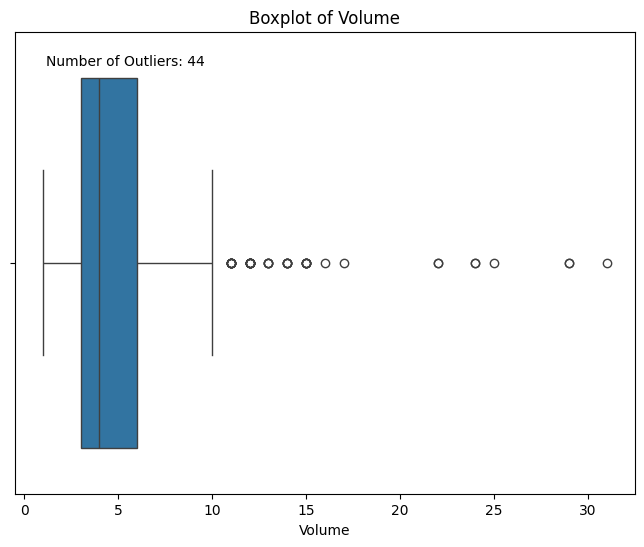

Analysis for Volume:
  Number of Outliers: 44
  Interquartile Range (IQR): 3.0


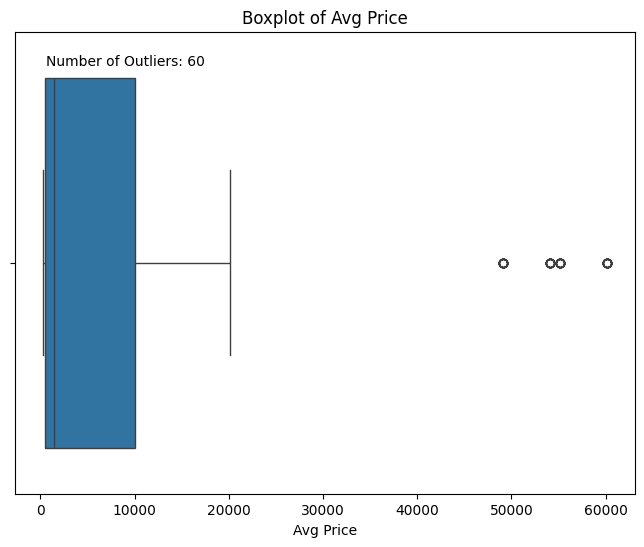

Analysis for Avg Price:
  Number of Outliers: 60
  Interquartile Range (IQR): 9635.0


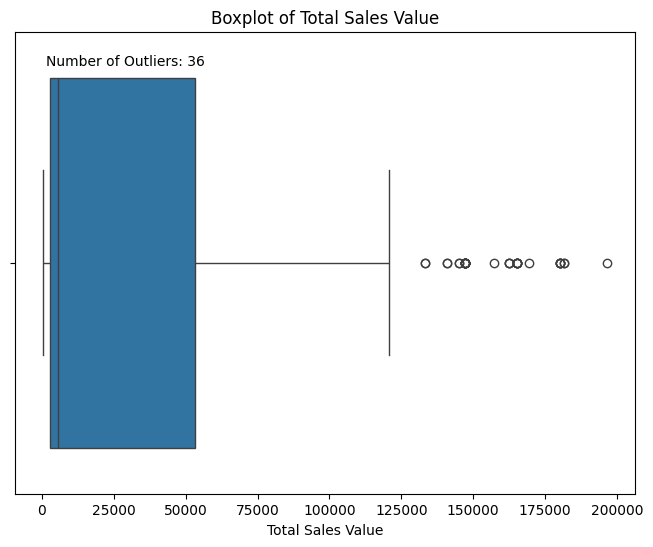

Analysis for Total Sales Value:
  Number of Outliers: 36
  Interquartile Range (IQR): 50500.0


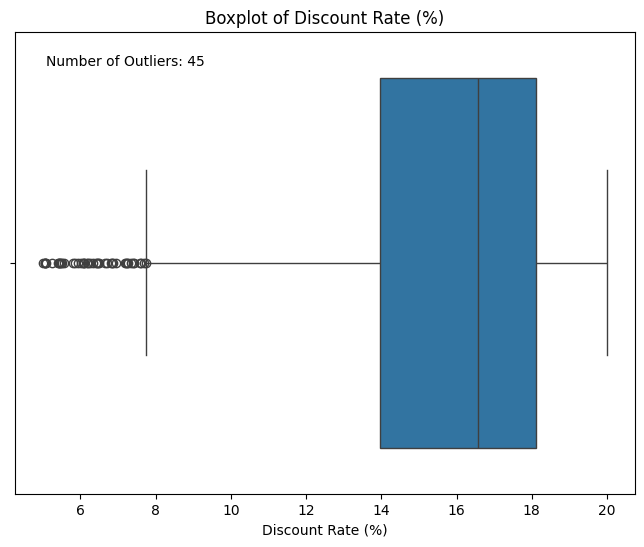

Analysis for Discount Rate (%):
  Number of Outliers: 45
  Interquartile Range (IQR): 4.149655934050962


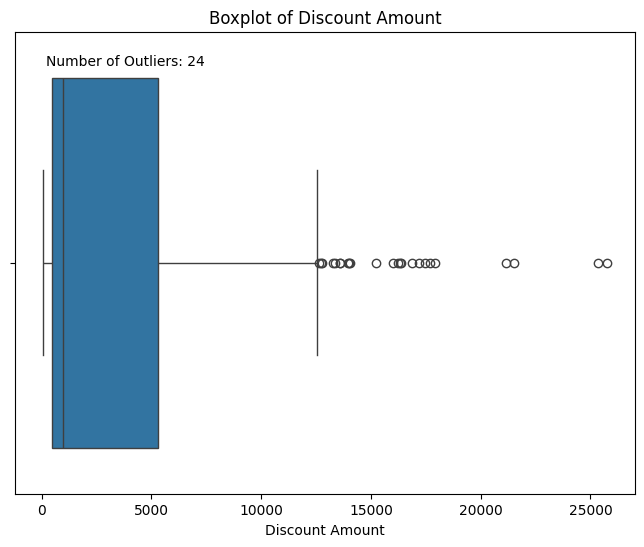

Analysis for Discount Amount:
  Number of Outliers: 24
  Interquartile Range (IQR): 4856.03612280112


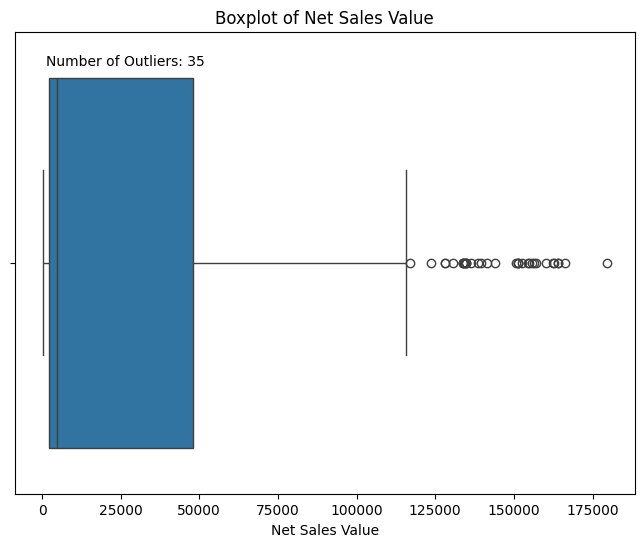

Analysis for Net Sales Value:
  Number of Outliers: 35
  Interquartile Range (IQR): 45645.70420627015


In [ ]:
import matplotlib.pyplot as plt
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

    # Calculate outliers
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    num_outliers = len(outliers)

    plt.text(0.05, 0.95, f"Number of Outliers: {num_outliers}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
    plt.show()

    print(f"Analysis for {col}:")
    print(f"  Number of Outliers: {num_outliers}")
    print(f"  Interquartile Range (IQR): {IQR}")




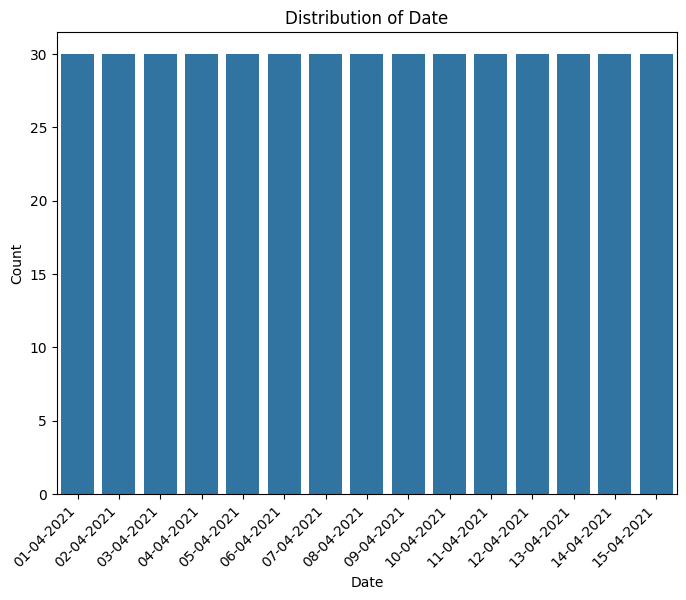

Value counts for Date:
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64



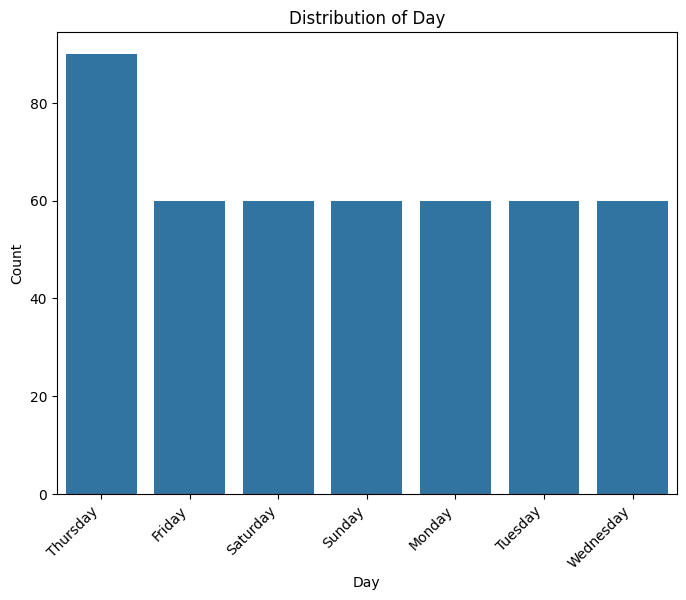

Value counts for Day:
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64



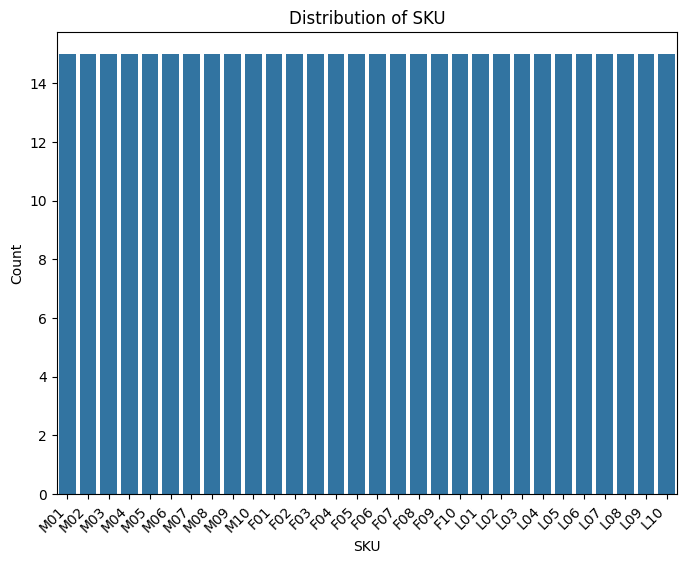

Value counts for SKU:
SKU
M01    15
M02    15
L09    15
L08    15
L07    15
L06    15
L05    15
L04    15
L03    15
L02    15
L01    15
F10    15
F09    15
F08    15
F07    15
F06    15
F05    15
F04    15
F03    15
F02    15
F01    15
M10    15
M09    15
M08    15
M07    15
M06    15
M05    15
M04    15
M03    15
L10    15
Name: count, dtype: int64



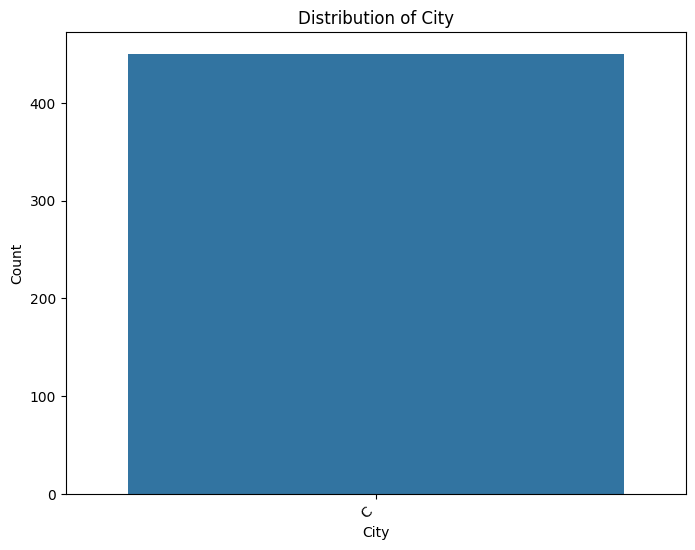

Value counts for City:
City
C    450
Name: count, dtype: int64



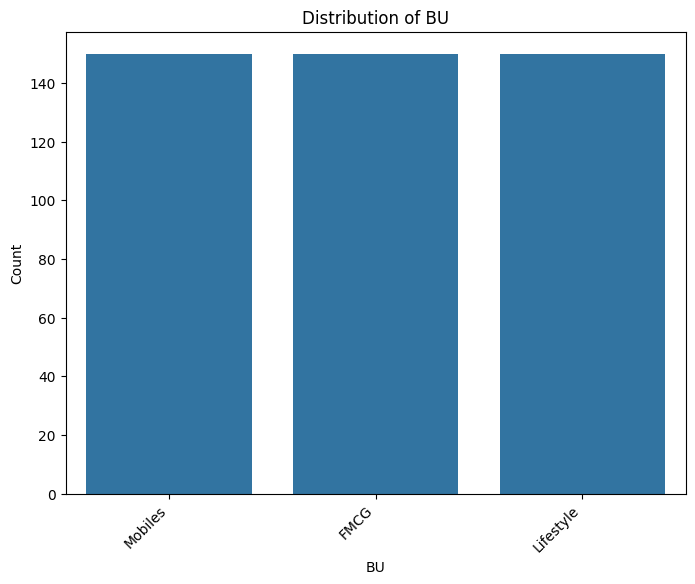

Value counts for BU:
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64



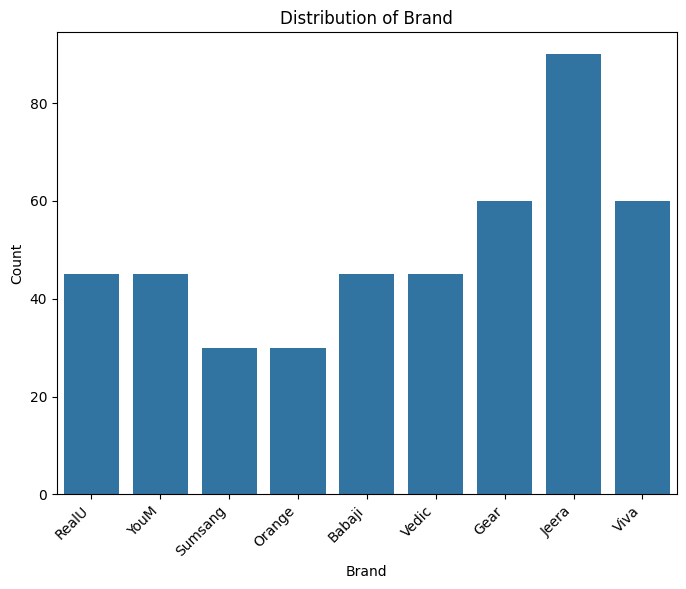

Value counts for Brand:
Brand
Jeera      90
Gear       60
Viva       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Sumsang    30
Orange     30
Name: count, dtype: int64



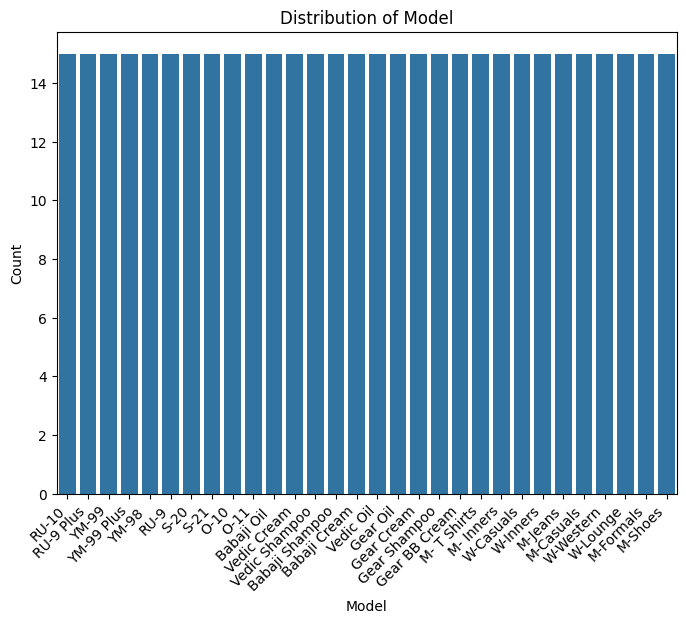

Value counts for Model:
Model
RU-10             15
RU-9 Plus         15
M-Formals         15
W-Lounge          15
W-Western         15
M-Casuals         15
M-Jeans           15
W-Inners          15
W-Casuals         15
M- Inners         15
M- T Shirts       15
Gear BB Cream     15
Gear Shampoo      15
Gear Cream        15
Gear Oil          15
Vedic Oil         15
Babaji Cream      15
Babaji Shampoo    15
Vedic Shampoo     15
Vedic Cream       15
Babaji Oil        15
O-11              15
O-10              15
S-21              15
S-20              15
RU-9              15
YM-98             15
YM-99 Plus        15
YM-99             15
M-Shoes           15
Name: count, dtype: int64



In [ ]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    # Analyze the distribution (example: print value counts)
    print(f"Value counts for {col}:\n{data[col].value_counts()}\n")


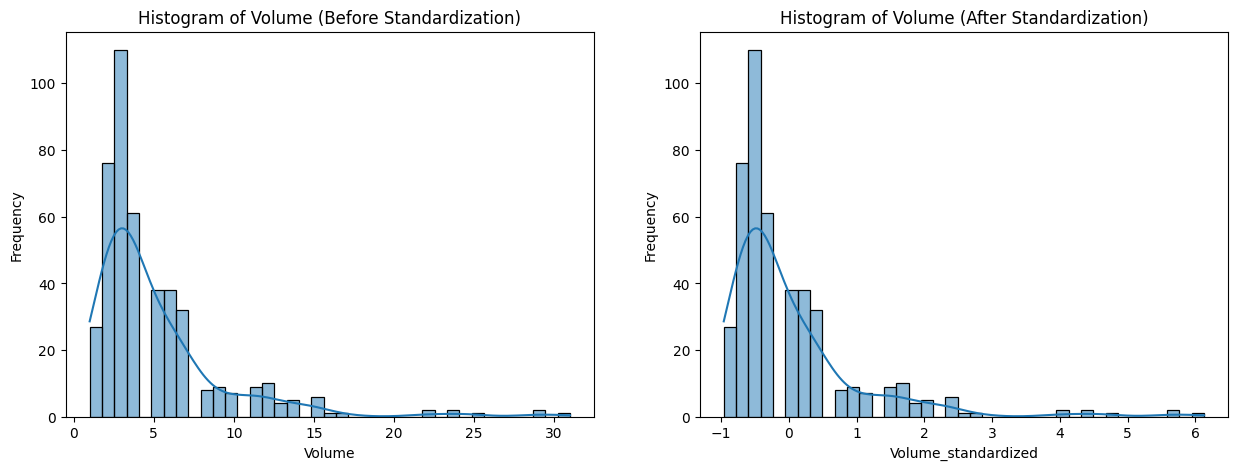

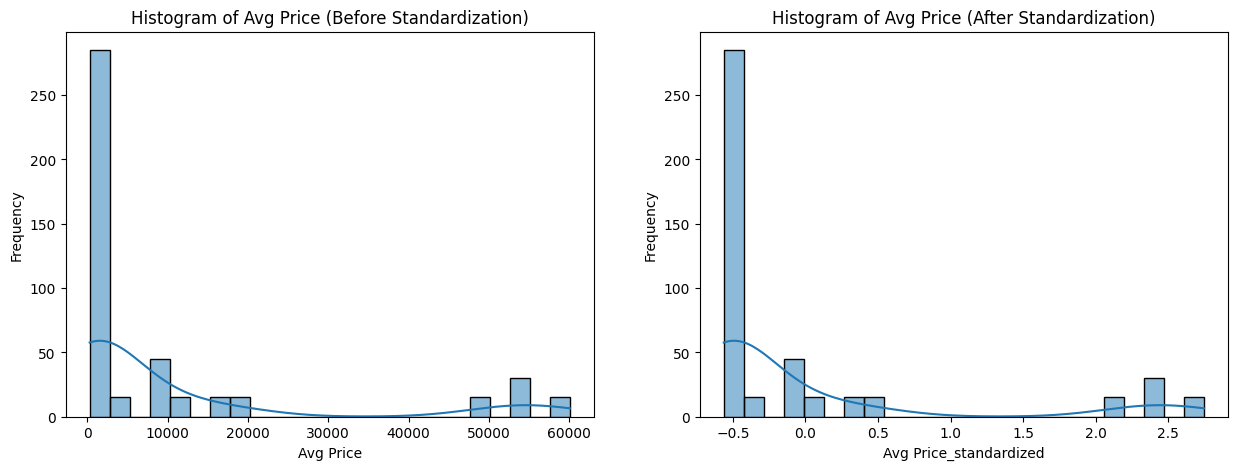

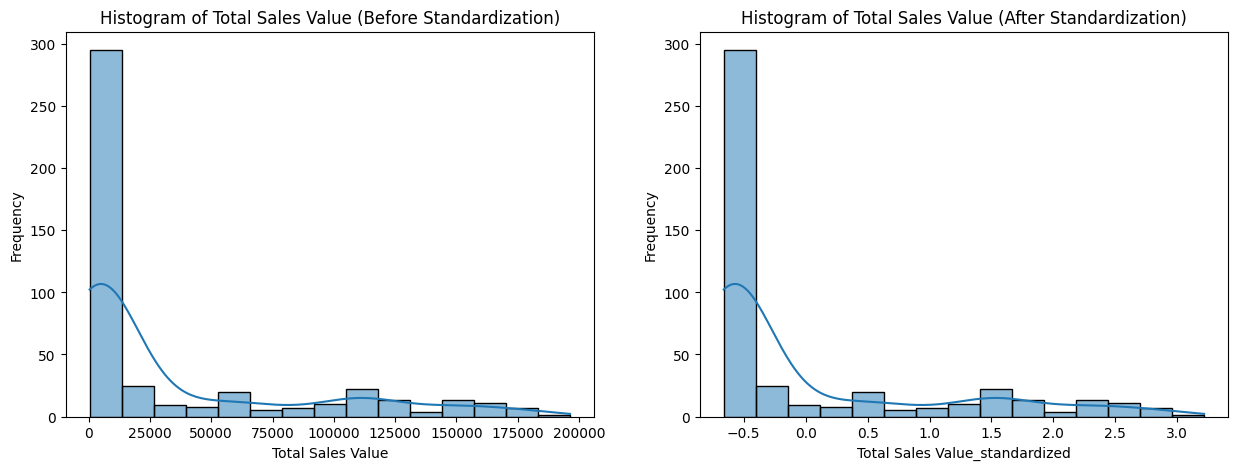

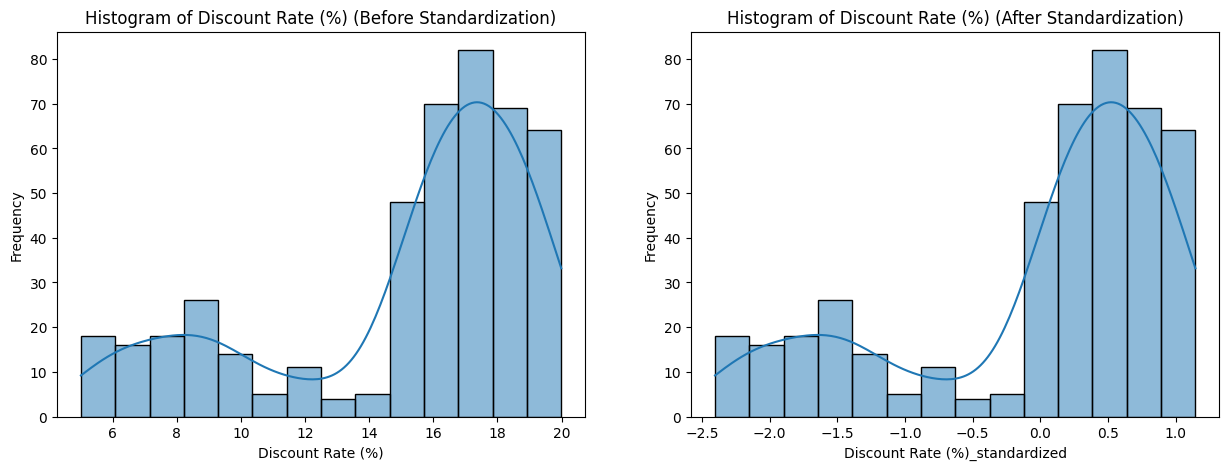

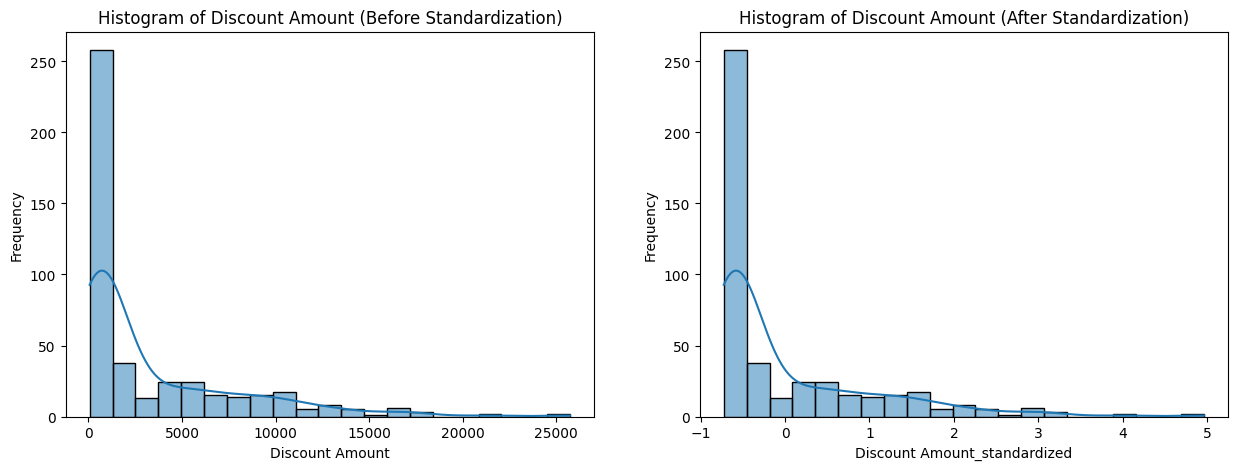

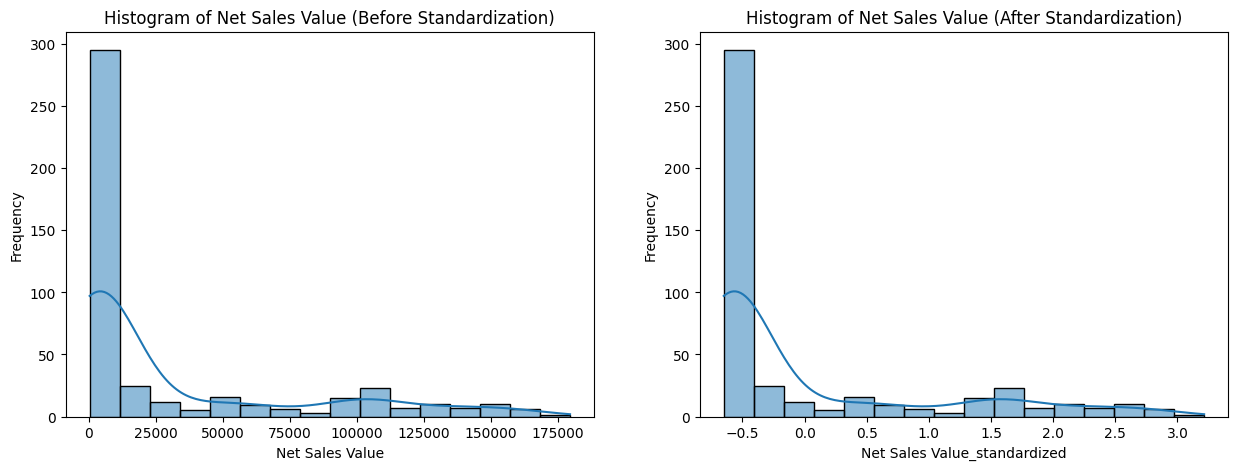

In [ ]:
import matplotlib.pyplot as plt
# Standardization (Z-score normalization)
for col in numerical_cols:
    mu = data[col].mean()
    sigma = data[col].std()
    data[col + '_standardized'] = (data[col] - mu) / sigma

# Show before and after comparisons
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Before standardization
    sns.histplot(data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col} (Before Standardization)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # After standardization
    sns.histplot(data[col + '_standardized'], kde=True, ax=axes[1])
    axes[1].set_title(f'Histogram of {col} (After Standardization)')
    axes[1].set_xlabel(col + '_standardized')
    axes[1].set_ylabel('Frequency')

    plt.show()


Standardization (Z-score Normalization)

Ensures all numerical features have a mean of 0 and a standard deviation of 1.
Prevents features with large values (e.g., income) from dominating the model.
Essential for distance-based models like KNN, SVM, and PCA.


Formula for Standardization (Z-score Normalization)
     Z=X-μ/σ




One-Hot Encoding (OHE)

Converts categorical features into numerical form without introducing false ordinal relationships.
Helps machine learning models interpret categorical variables correctly.

* SUMMARY

 Descriptive analytics and data visualizations help us understand patterns, trends, and insights from raw data before applying any machine learning models. Here are some key takeaways from these techniques:

* Central Tendency & Spread

Mean and median values indicate the center of the dataset, helping identify skewness.
Standard deviation and range show how spread out the data is.
Skewness and kurtosis highlight whether the data follows a normal distribution or has extreme values.

* Outlier Detection

Box plots and histograms often reveal outliers that can impact machine learning models.
Outliers can be removed or transformed using techniques like winsorization or log transformation.

* Categorical Variable Insights

Bar charts and frequency plots highlight dominant categories and their impact on the target variable.
Helps decide whether one-hot encoding or label encoding should be used for categorical variables.